# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

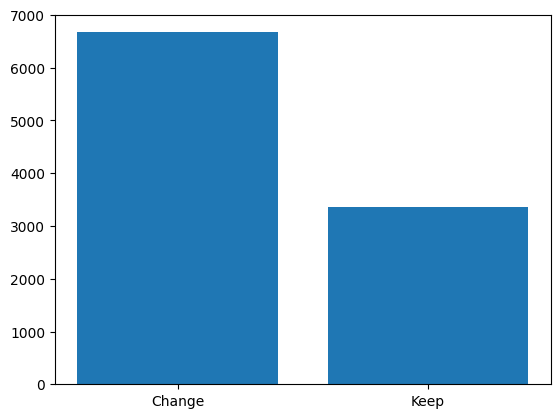

In [2]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):

  doors = ['A', 'B', 'C']
  correct_door = choice(doors)

  first_choice = choice(doors)
  doors.remove(first_choice)

  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")

  return second_choice == correct_door


def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))


plot = plt.bar([1, 2],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000))],
               tick_label=["Change", "Keep"])

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**.

A player following it will alternate **randomly** between "Change" and "Keep".


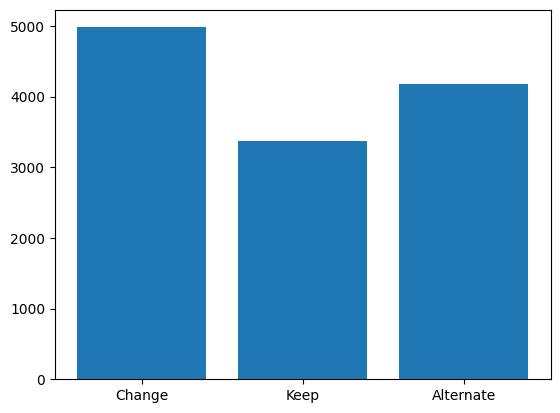

In [3]:
import matplotlib.pyplot as plt
from random import choice
import numpy as np

def play_one_game(strategy: str) -> bool:
    """
    Simule une partie du jeu des portes en suivant une stratégie donnée.

    Parameters
    ----------
    strategy : str
        La stratégie à suivre pour cette partie, qui peut être "change" pour changer de porte après l'indice,
        ou "keep" pour garder la porte initialement choisie.

    Returns
    -------
    bool
        Retourne True si la stratégie a mené à une victoire, False sinon.

    Raises
    ------
    ValueError
        Levée si la stratégie fournie n'est pas reconnue.
    """
    # Nous initialisons la liste des portes
    doors = ['A', 'B', 'C']

    # Choisir aleatoirement une porte pour la bonne porte
    correct_door = choice(doors)

    # Nous choississons aleatoirement une première porte et la supprimons de la liste
    first_choice = choice(doors)
    doors.remove(first_choice)

    # On lance une boucle while et on continue tant que la première porte n'est pas la bonne
    # Si nous trouvons la bonne porte alors on sort de la boucle.
    while True:
        hint_door = choice(doors)
        if hint_door != correct_door:
            doors.remove(hint_door)
        break

    # En fonction de la strategy on change ou on garde la première porte
    if strategy.lower() == "change":
        second_choice = choice(doors)
    elif strategy.lower() == "keep":
        second_choice = first_choice
    elif strategy.lower() == "alternate":
        second_choice = choice([choice(doors), first_choice])
    else:
        # Si la strategy est inconnue alors on leve une erreur
        raise ValueError("Strategy not recognized!")

    # on retourne le resultat de la partie en boolean (True, False ou 1, 0)
    return second_choice == correct_door


def play_many_games(strategy: str, nb_turns: int):
    """
    Simulateur de plusieurs parties.

    Parameters
    ----------
    strategy : str
        La stratégie à suivre pour ces parties.
    nb_turns : int
        Le nombre de parties à jouer.

    Returns
    -------
    list
        Une liste contenant les résultats de toutes les parties jouées
        (1 pour une victoire, 0 pour une défaite).
    """
    # Si play_one_game() renvoi un True (ou un 1 = a une victoire) alors on rentre 1 dans le liste, sinon 0
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))


# Ici nous ajoutons 1 barre au graphique et nous l'affichons avec pour légende Alternate
# et nous utilison numpy pour choisir aleatoirement entre change et keep
strategies = ["Change", "Keep", "Alternate"]

plot = plt.bar(
    [1, 2, 3],
    [
        sum(play_many_games(stra_, 10000)) for stra_ in strategies
    ],
    tick_label=strategies
)

# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

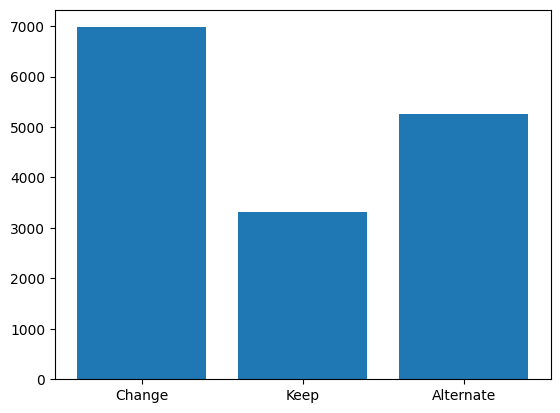

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def play_monty_hall(
    strategy: str,
    nb_turns: int
) -> int:
    la_bonne = np.random.randint(0, 3, nb_turns)
    premier_choix = np.random.randint(0, 3, nb_turns)

    hint_door = np.where(
        (la_bonne == premier_choix),
        np.random.choice([0, 1, 2], nb_turns) % 3,
        (3 - (la_bonne + premier_choix))
    )

    if strategy.lower() == "change":
        deuxieme_choix = 3 - (premier_choix + hint_door)
        win = np.equal(la_bonne, deuxieme_choix).sum()
    elif strategy.lower() == "keep":
        win = np.equal(la_bonne, premier_choix).sum()
    elif strategy.lower() == "alternate":
        alternate = np.array(['change', 'keep'] * (nb_turns // 2))
        if nb_turns % 2:
            alternate = np.append(alternate, 'change')

        deuxieme_choix = np.where(
            alternate == 'change', 3 - (premier_choix + hint_door),
            premier_choix
        )
        win = np.equal(la_bonne, deuxieme_choix).sum()

    return win


strategies = ['Change', 'Keep', 'Alternate']
win_counts = [play_monty_hall(strategy, 10000) for strategy in strategies]

plot = plt.bar(
    [1, 2, 3],
    win_counts,
    tick_label=strategies
)
plt.show()


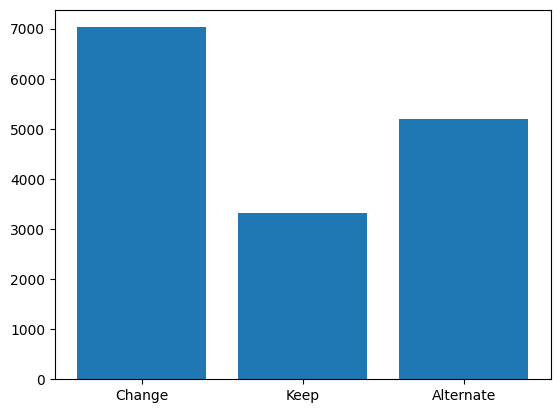

In [7]:
import numpy as np

def play_monty_hall(strategy: str, nb_turns: int) -> int:
    la_bonne = np.random.randint(0, 3, nb_turns)
    premier_choix = np.random.randint(0, 3, nb_turns)

    hint_mask = la_bonne == premier_choix
    hint_door = np.where(hint_mask, np.random.randint(0, 3, nb_turns), 3 - (la_bonne + premier_choix))

    if strategy.lower() == "alternate":
        strategies = np.array(['change', 'keep'] * (nb_turns // 2))
        if nb_turns % 2:
            strategies = np.append(strategies, 'change')
    else:
        strategies = np.array([strategy.lower()] * nb_turns)

    deuxieme_choix = np.where(strategies == 'change', 3 - (premier_choix + hint_door), premier_choix)

    return np.equal(la_bonne, deuxieme_choix).sum()

strategies = ['Change', 'Keep', 'Alternate']
win_counts = [play_monty_hall(strategy, 10000) for strategy in strategies]

plot = plt.bar(
    [1, 2, 3],
    win_counts,
    tick_label=strategies
)
plt.show()
